<a href="https://colab.research.google.com/github/RichardRajesh/5731-Computational-methods/blob/main/Rajesh_Bodas_Excercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy


sample_data = ['I have done textmining for the first time in last semister where in i have ciollected the data related \nto job postings from the "reddit" app',
    'However i felt the text mining i have done in my last assignment in this course was more intresting\n where in i have collected data of movie reviews from the imdb website where i was asked to collect 1000 reviews from two movies']


nlp = spacy.load("en_core_web_sm")

def preprocess_text(texts):
    processed_texts = []
    for text in texts:
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(tokens)
    return processed_texts

processed_data = preprocess_text(sample_data)


id2word = corpora.Dictionary(processed_data)
corpus = [id2word.doc2bow(text) for text in processed_data]


def calculate_coherence_score(corpus, id2word, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = calculate_coherence_score(corpus, id2word, processed_data, limit=11)


best_model_index = coherence_values.index(max(coherence_values))
best_model = model_list[best_model_index]
best_k = best_model.num_topics

print(f"Optimal number of topics (K): {best_k}")


topics = best_model.print_topics(num_topics=best_k, num_words=5)
for topic in topics:
    print(f"Topic {topic[0] + 1}: {topic[1]}")

Optimal number of topics (K): 2
Topic 1: 0.066*"movie" + 0.065*"review" + 0.062*"collect" + 0.059*"datum" + 0.041*"feel"
Topic 2: 0.053*"textmining" + 0.050*"datum" + 0.047*"posting" + 0.047*"job" + 0.047*"semister"


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

collection_of_varied_texts_for_analysis = ['I have done textmining for the first time in last semister where in i have ciollected the data related \nto job postings from the "reddit" app',
    'However i felt the text mining i have done in my last assignment in this course was more intresting\n where in i have collected data of movie reviews from the imdb website where i was asked to collect 1000 reviews from two movies',
    'The\nimportant features i beleve that could be helpful in building the model are\n* The username of the reviewer which could be helpful in identifying the user details whose profile could help on analysing\nthe strength of the review provided by a person.\n* Movie name obviously helps in differentiating the reviews by the film they belong to when we have a pool of movie reviews.\n* Review Date helps in understanding since how long the movie is in craze in people.\n* Url of the movie review data for better accessibility\n* Rating helps in understanding the review easily as a number can explain it well.'

]


text_feature_converter = TfidfVectorizer()
transformed_text_tfidf_representation = text_feature_converter.fit_transform(collection_of_varied_texts_for_analysis)


number_of_desired_topics_for_analysis = 2
semantic_analysis_model = TruncatedSVD(n_components=number_of_desired_topics_for_analysis)
reduced_dimensionality_topic_matrix = semantic_analysis_model.fit_transform(transformed_text_tfidf_representation)


extracted_text_terms = text_feature_converter.get_feature_names_out()
important_terms_per_topic = []
for i, topic in enumerate(semantic_analysis_model.components_):
    top_terms = [extracted_text_terms[idx] for idx in topic.argsort()[-5:][::-1]]
    important_terms_per_topic.append(top_terms)
    print(f"Topic {i + 1}: {', '.join(top_terms)}")




Topic 1: the, in, have, where, from
Topic 2: review, the, helps, could, be


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


text_collection = [
    'I have done textmining for the first time in last semister where in i have ciollected the data related \nto job postings from the "reddit" app',
    'However i felt the text mining i have done in my last assignment in this course was more intresting\n where in i have collected data of movie reviews from the imdb website where i was asked to collect 1000 reviews from two movies',
    'The\nimportant features i beleve that could be helpful in building the model are\n* The username of the reviewer which could be helpful in identifying the user details whose profile could help on analysing\nthe strength of the review provided by a person.\n* Movie name obviously helps in differentiating the reviews by the film they belong to when we have a pool of movie reviews.\n* Review Date helps in understanding since how long the movie is in craze in people.\n* Url of the movie review data for better accessibility\n* Rating helps in understanding the review easily as a number can explain it well.'
]


stop_words_set = set(stopwords.words('english'))

def text_preprocessor(text):
    words_tokenized = word_tokenize(text)
    words_preprocessed = [word.lower() for word in words_tokenized if word.isalpha() and word.lower() not in stop_words_set]
    return words_preprocessed

processed_text_collection = [text_preprocessor(text) for text in text_collection]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


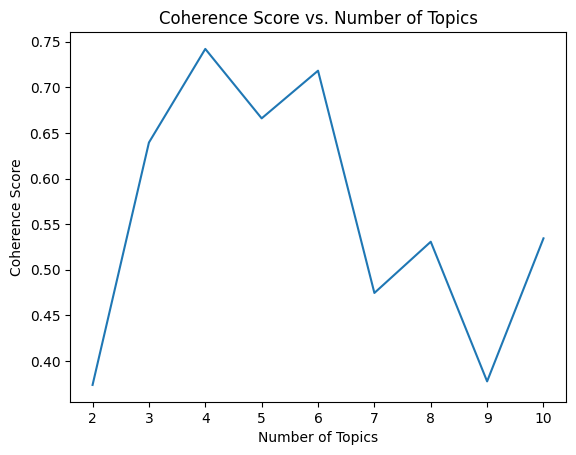

In [ ]:
from gensim.models import LdaModel as LDAModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary as GensimDictionary
from gensim.models import CoherenceModel as CoherenceEvalModel
import matplotlib.pyplot as plt


gensim_dictionary = GensimDictionary(processed_text_collection)
corpus = [gensim_dictionary.doc2bow(doc) for doc in processed_text_collection]

def calculate_coherence(corpus, dictionary, texts, num_topics, alpha_val, beta_val):
    lda_model = LDAModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha=alpha_val, eta=beta_val)
    coherence_eval_model = CoherenceEvalModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_eval_model.get_coherence()
    return coherence_score


num_topics_values = range(2, 11)


coherence_scores = []


alpha_val = 'auto'
beta_val = 'auto'


for num_topics in num_topics_values:
    coherence_score = calculate_coherence(corpus, gensim_dictionary, processed_text_collection, num_topics, alpha_val, beta_val)
    coherence_scores.append(coherence_score)


plt.plot(num_topics_values, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.show()


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:

%%capture
!pip install bertopic

In [ ]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']


In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

2024-03-29 03:29:10,215 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-03-29 04:05:12,114 - BERTopic - Embedding - Completed ✓
2024-03-29 04:05:12,118 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 04:05:58,059 - BERTopic - Dimensionality - Completed ✓
2024-03-29 04:05:58,061 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 04:06:44,320 - BERTopic - Cluster - Completed ✓
2024-03-29 04:06:44,346 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 04:06:51,965 - BERTopic - Representation - Completed ✓


In [ ]:
topic_frequency_statistics = topic_model.get_topic_info(); topic_frequency_statistics.head(5)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,6507,-1_to_is_the_of,"[to, is, the, of, and, it, you, for, in, that]",[Computer Equipment Garage Sale:\n\nI've final...
1,0,1843,0_game_team_games_he,"[game, team, games, he, players, season, hocke...","[The problem with your nihilistic approach, Ro..."
2,1,584,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...",[The following document summarizes the Clipper...
3,2,490,2_ites_yep_huh_ken,"[ites, yep, huh, ken, art, why, each, too, man...","[\nHuh?, \nYep.\n, ites:]"
4,3,376,3_you_your_jim_post,"[you, your, jim, post, context, deleted, that,...",[}>}>}(a) out of context;\n}>}>Must have misse...


In [ ]:
topic_model.get_topic(0)

[('game', 0.010462875290792255),
 ('team', 0.009122863065700803),
 ('games', 0.007256230198245023),
 ('he', 0.007180789855746043),
 ('players', 0.006380304025993309),
 ('season', 0.006298192565817984),
 ('hockey', 0.006172656319508718),
 ('play', 0.005822467641236037),
 ('25', 0.00570581497729004),
 ('year', 0.00569176463235486)]

In [ ]:
topic_model.get_topic(0)

[('game', 0.010462875290792255),
 ('team', 0.009122863065700803),
 ('games', 0.007256230198245023),
 ('he', 0.007180789855746043),
 ('players', 0.006380304025993309),
 ('season', 0.006298192565817984),
 ('hockey', 0.006172656319508718),
 ('play', 0.005822467641236037),
 ('25', 0.00570581497729004),
 ('year', 0.00569176463235486)]

In [ ]:
topic_model.reduce_topics(docs, nr_topics=60)

2024-03-29 04:16:46,250 - BERTopic - Topic reduction - Reducing number of topics
2024-03-29 04:16:55,236 - BERTopic - Topic reduction - Reduced number of topics from 212 to 60


In [ ]:
print(topic_model.topics_)

[0, -1, 2, 11, 11, -1, 1, 0, 0, -1, -1, -1, -1, 37, 14, 2, -1, 3, 19, 15, 6, 12, 10, 15, 0, 14, 3, -1, -1, 21, 6, 3, 18, 0, 16, 20, 7, 28, -1, -1, 14, 24, 32, -1, 0, -1, -1, 13, 1, -1, -1, 6, 3, 1, 28, 42, -1, -1, 8, 30, 0, -1, -1, 36, 2, 39, 0, -1, -1, -1, 7, -1, 9, 8, -1, -1, 0, 18, 1, 0, 26, 6, -1, 32, 7, -1, 8, 2, -1, 45, 0, 5, 4, 7, 2, 7, -1, -1, -1, 1, 54, 10, -1, 2, 5, 0, -1, -1, 9, 18, 20, -1, -1, 12, 2, 2, -1, 39, 0, -1, -1, 43, -1, -1, 19, 9, -1, 5, -1, -1, 8, 4, -1, 0, 11, 5, 18, 1, 11, -1, -1, 20, 21, 12, 40, 1, 20, 10, 0, -1, 15, 15, 11, -1, 17, -1, -1, 2, 14, 22, -1, 5, -1, -1, -1, -1, -1, 14, 39, 16, 7, -1, -1, -1, 1, -1, 0, -1, 15, 0, 30, 0, 44, -1, -1, 5, -1, -1, 2, -1, -1, 8, 5, 4, 8, 4, 2, -1, -1, -1, -1, -1, -1, -1, -1, 6, 1, -1, 11, 4, 15, 12, -1, 9, 15, 3, -1, -1, -1, 5, 0, 17, -1, 6, 1, -1, 1, 15, -1, 0, -1, -1, -1, -1, 0, -1, -1, 0, 0, 12, 35, 35, 16, -1, -1, 13, 5, 6, 4, 2, 18, 13, 1, -1, 24, -1, 13, -1, -1, -1, 35, -1, 31, -1, 7, -1, 7, -1, -1, 7, 31, -1, 5, 1

In [50]:
similar_topics, similarity = my_model.find_topics("vehicle", top_n=5)


In [48]:
topic = my_model.get_topic(60)


In [ ]:
topic_model.save("my_model")

2024-03-29 04:21:49,522 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
my_model = BERTopic.load("my_model")

In [ ]:
topic_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")

In [ ]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cpu")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here


Getting the main intension or the main perspective of the data can be done using the Topic modelling, mainly while handling with the data which has high dimensionality and all this done by uncovering the main subjects within it. We have various techniques for the purpose of topic modelling, that can be Latent Semantic Analysis (LSA) and the LDA which are the most commonly used in the market. LDA is the one which is the most leading one and mostly used by the companies. It has the capability of extracting the topic probabilities from the data which is statistical. Coming to the LSA, it is a technique which employs a huge or the bg of words model and also this utilizes the singular value decomposition for the identification of latent themes in the terms of data. For the purpose of evaluating any quality related of topic models, we can choose the Topic coherence, its because topic models doesnot have a guarantee in interpretability. Topic coherence is used in measuring the meaningfulness of the topics by analysing the similarity among the words within any topic. If coherence score is high then the model is best. Finally I can say that LDA ids the most used and can give the accurate and strong results with almost 30 topics, BERTopic is also the most best one when it comes to the scenario where if advanced technique and larger vocabulary presents.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
In this exercise I got know the various techniques for understanding the text data
and also finding the main main topics in the text data. I used a different ways for doing all this.
 LDA, LSA, then Ida2vec and also the final one that is BERTopic. in each of the technique, it helped in finding the main topics in the text.
 I faced a lot of challenges in this exercise, few parts are very tricky like I need to understand each and every settings for each way I used.
 It made me think a while for finding out what are the topics which meant to take careful thinking.
 when setting up the BERTopic and Ida2vec it was very hard and took very long. when uploading the data from sklearn, it took almost very long and it between errors, all these made my work very hectic. while working with the BERTopic, the code was difficult to understand.
 I used the source given by you and tried a lot to first understand and also used chatgpt to explain me the code which we have in the reference website.
 Now I want to say about the relevance between my course and this exercise, as I'm a information science student I can now able to find the most important things from a very large amount of text.
 All these four techniques can help in many areas like it will help in organizing various documents, I will be able to find and understand the opinions in the data.
 This is a very good opportunity for us to acknowledge all these techniques.
 It helps in finding the meaningful information which is very crucial in our department.
 it makes me analyse the customer reviews and also helps in extracting the meaningful insights from any social media data.



'''